# Optimization II | HW 1

Shreyansh Agrawal: sa55742

Rianna Patel: rnp599

Importing relevant packages

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
import pandas as pd
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
tf.random.set_seed(20) #seeding to ensure reproducibility
seed(20)

In [ ]:
from google.colab import drive # mounting drive for easy read-write
drive.mount('/content/drive')

Mounted at /content/drive


Loading MNIST Dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalizing the pixel intensities

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

x_train_plot = x_train
x_test_plot = x_test

Plotting a sample image

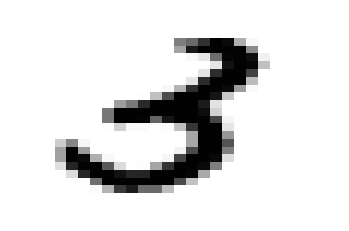

In [ ]:
plt.pcolor( 1-x_train[811,::-1,:] , cmap = 'gray' );
plt.axis('off');

Data processing on MNIST dataset to feed into our NN model

In [ ]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

xshape = x_train.shape[1:4]

Definining NN Model

In [ ]:
NNmodel2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(), # this layer is VERY important between conv and dense!
        
        tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(64,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(32,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

Compiling Model

In [ ]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 12, 12, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          204864    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                      

Tuning the model on 80% of the train data 

In [ ]:
EPOCHS = 35

In [ ]:
model_fit = NNmodel2.fit(x_train,y_train,epochs=EPOCHS,validation_split=0.2,batch_size=500)

Epoch 1/35
96/96 [==============================] - 4s 29ms/step - loss: 0.7443 - accuracy: 0.8829 - val_loss: 2.6316 - val_accuracy: 0.1991
Epoch 2/35
96/96 [==============================] - 3s 27ms/step - loss: 0.2968 - accuracy: 0.9877 - val_loss: 3.5204 - val_accuracy: 0.1060
Epoch 3/35
96/96 [==============================] - 3s 31ms/step - loss: 0.2477 - accuracy: 0.9935 - val_loss: 2.5680 - val_accuracy: 0.1795
Epoch 4/35
96/96 [==============================] - 3s 34ms/step - loss: 0.2105 - accuracy: 0.9965 - val_loss: 1.4598 - val_accuracy: 0.5233
Epoch 5/35
96/96 [==============================] - 3s 31ms/step - loss: 0.1804 - accuracy: 0.9983 - val_loss: 0.4211 - val_accuracy: 0.9480
Epoch 6/35
96/96 [==============================] - 3s 27ms/step - loss: 0.1543 - accuracy: 0.9992 - val_loss: 0.2164 - val_accuracy: 0.9847
Epoch 7/35
96/96 [==============================] - 3s 28ms/step - loss: 0.1338 - accuracy: 0.9997 - val_loss: 0.1637 - val_accuracy: 0.9904
Epoch 8/35
96

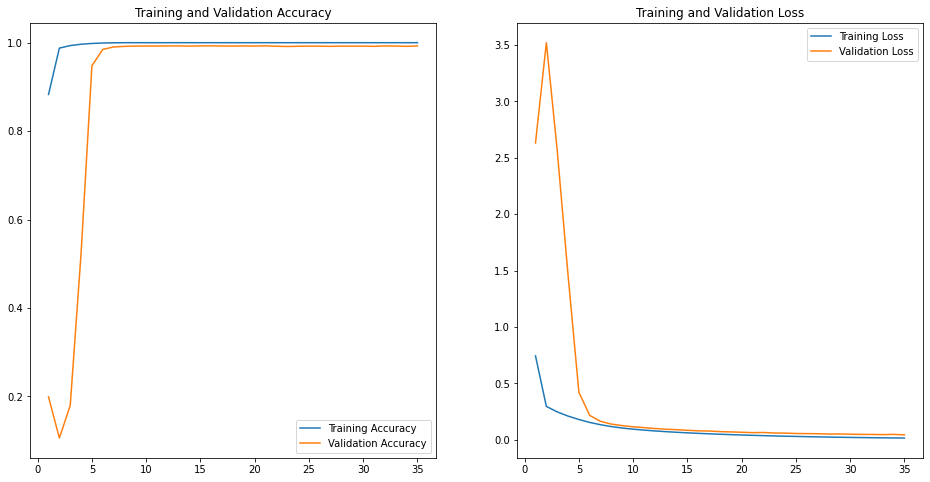

In [ ]:
#Visualizing the Learning Curves 

acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(1,EPOCHS+1)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test)) # acheived 99% accuracy with current confirguration

313/313 [==============================] - 1s 2ms/step
0.9914


Retraining model on complete train dataset based on the parameters tuned before

In [ ]:
NNmodel2.fit(x_train,y_train,epochs=EPOCHS,validation_split=0,batch_size=500)

Epoch 1/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0730 - accuracy: 0.9838
Epoch 2/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0384 - accuracy: 0.9940
Epoch 3/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0284 - accuracy: 0.9971
Epoch 4/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0232 - accuracy: 0.9984
Epoch 5/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0198 - accuracy: 0.9995
Epoch 6/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0175 - accuracy: 0.9998
Epoch 7/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0164 - accuracy: 0.9999
Epoch 8/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0158 - accuracy: 0.9999
Epoch 9/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 10/35
120/120 [==============================] - 3s 23ms/step - loss: 0.0148 - accura

In [ ]:
# saving the model for reproducibility

NNmodel2.save("/content/drive/MyDrive/optimization_hw_1.h5")

Run from here

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
import pandas as pd
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

x_train_plot = x_train
x_test_plot = x_test

x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

xshape = x_train.shape[1:4]

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# loading the saved model
NNmodel2 = tf.keras.models.load_model("/content/drive/MyDrive/optimization_hw_1.h5")

In [ ]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test)) # we have achieved 99%+ accuracy

313/313 [==============================] - 7s 2ms/step
0.9942


In [ ]:
flase_index = np.where(pred2!=y_test)

In [ ]:
len(flase_index[0])

58

In [ ]:
for x in flase_index:
  correct = y_test[x]
  false = pred2[x]

In [ ]:
combined = list(zip(correct, false))
combined_df = pd.DataFrame(combined, columns=["Correct","False"])

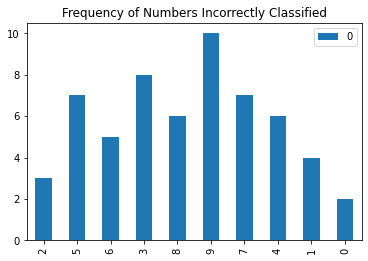

In [ ]:
from collections import Counter

corrCount = Counter(correct)
df = pd.DataFrame.from_dict(corrCount, orient='index')
df.plot(kind='bar', title = 'Frequency of Numbers Incorrectly Classified')

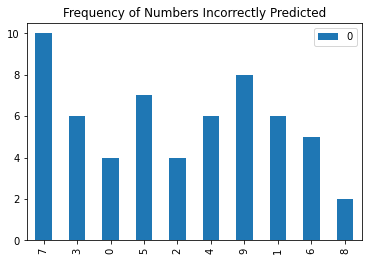

In [ ]:
falseCount = Counter(false)
df = pd.DataFrame.from_dict(falseCount, orient='index')
df.plot(kind='bar', title = 'Frequency of Numbers Incorrectly Predicted')

In [ ]:
combinedCount = Counter(combined)
combinedCount = sorted(combinedCount.items(), key=lambda x:x[1], reverse=True)[:10]

combinedCountDict = dict(combinedCount)
print(combinedCountDict)


{(3, 5): 5, (9, 4): 5, (4, 9): 5, (7, 1): 4, (2, 7): 3, (5, 3): 3, (1, 3): 3, (9, 7): 3, (6, 0): 2, (8, 2): 2}


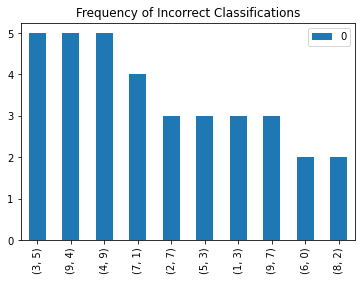

In [ ]:

df = pd.DataFrame.from_dict(combinedCountDict, orient='index')
df.plot(kind='bar', title = 'Frequency of Incorrect Classifications')

In [ ]:
combined_df["index"] = flase_index[0]

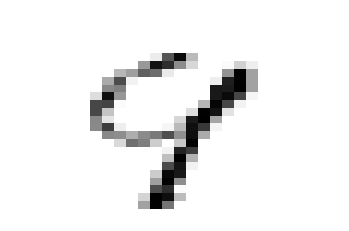

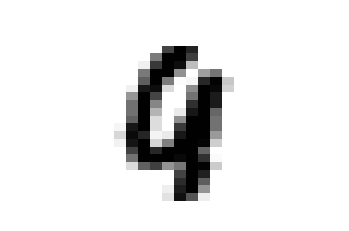

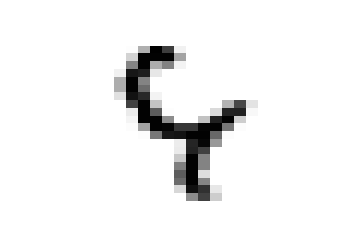

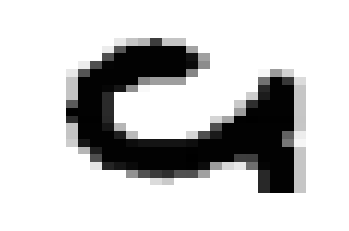

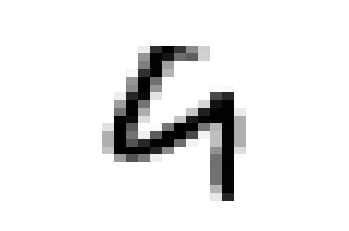

In [ ]:
# lets plot and check which images are incorrectly predicted

num_correct = 9
num_false = 4
indexes = combined_df[(combined_df['Correct']==num_correct)&(combined_df['False']==num_false)]['index']

#print("Below are the images for " + str(num_correct) +" that were misclassified as " + str(num_false))

#plt.title("Below are the images for " + str(num_correct) +" that were misclassified as " + str(num_false))

for i in indexes:
  plt.pcolor( 1-x_test_plot[i,::-1,:] , cmap = 'gray' );
  plt.axis('off')
  plt.show()

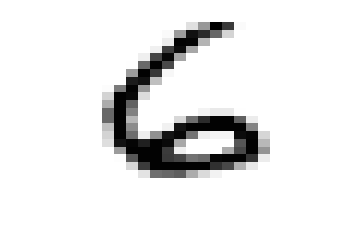

In [ ]:
i=600
plt.pcolor( 1-x_test_plot[i,::-1,:] , cmap = 'gray' );
plt.axis('off')
plt.show()

Anvil


In [ ]:
!pip install anvil-uplink
import anvil.server

anvil.server.connect("D3VVAFR652NFVMQWI34IUFX5-QMGH4C2CANKOMZJB")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=8da0b095dc20f61fd41adb312475064b9a4d733d3dc822e7e8be01bbc83dee7a
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
import anvil.server

anvil.server.connect("D3VVAFR652NFVMQWI34IUFX5-QMGH4C2CANKOMZJB")

@anvil.server.callable
def anvil_predict(fetch_array):
  NNmodel2 = tf.keras.models.load_model("optimization_hw_1.h5")
  return_value = np.argmax(NNmodel2.predict(np.expand_dims(np.expand_dims(fetch_array, axis=0), axis=3)), axis=1)[0]
  return return_value

anvil.server.wait_forever()